In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob
from keras import models

from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Food Classification/train_noise_and_noise_rot15_flipv'
test_path = '/content/drive/MyDrive/Food Classification/validation'

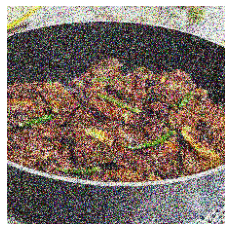

In [ ]:
img = load_img(train_path + "/Class 1/0.jpg", target_size=(224,224))
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
images = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7']

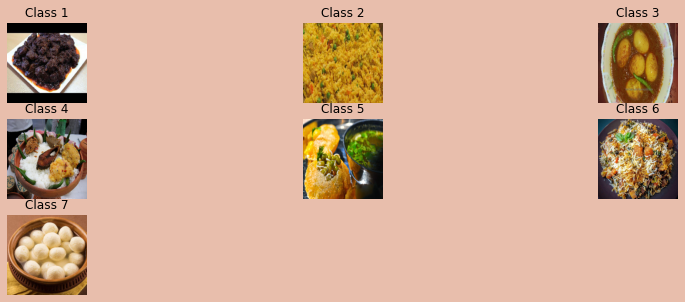

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(15,5))
for i in range(7):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    fig.patch.set_facecolor('#E8BEAC')
    #Above code adds a background color for subplots you can change the hex color code as you wish
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path +"/"+ images[i] +"/1_raw_.jpg", target_size=(224,224)))

In [ ]:
#import os
#os.listdir(test_path),os.listdir(train_path)

(['Class 3', 'Class 1', 'Class 2', 'Class 7', 'Class 4', 'Class 6', 'Class 5'],
 ['Class 6', 'Class 2', 'Class 7', 'Class 1', 'Class 3', 'Class 5', 'Class 4'])

In [ ]:
'''
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(15,5))
for i in range(7):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    fig.patch.set_facecolor('#E8BEAC')
    #Above code adds a background color for subplots you can change the hex color code as you wish
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(test_path +"/"+ images[i] +"/val_1.jpg", target_size=(224,224)))

'''

'\nimport matplotlib.pyplot as plt\nimport numpy as np\n\nfig = plt.figure(figsize =(15,5))\nfor i in range(7):\n    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])\n    fig.patch.set_facecolor(\'#E8BEAC\')\n    #Above code adds a background color for subplots you can change the hex color code as you wish\n    plt.title(images[i])\n    plt.axis("off")\n    ax.imshow(load_img(test_path +"/"+ images[i] +"/val_1.jpg", target_size=(224,224)))\n\n'

In [ ]:
# x = img_to_array(img)
# print(x.shape)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_WIDTH, IMAGE_HEIGHT  = 224, 224


train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=45,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
                                                    batch_size = 32,
                                                    color_mode='rgb',
                                                    class_mode = "categorical",
                                                    classes = images)

test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
                                                    color_mode='rgb',
                                                    batch_size = 32,
                                                    shuffle=False,
                                                    class_mode = "categorical",
                                                    classes = images)

Found 2619 images belonging to 7 classes.
Found 216 images belonging to 7 classes.


In [ ]:
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

NameError: ignored

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(128, 128, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(7)) #output
model.add(Activation("softmax"))

In [ ]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [ ]:
model.summary()


#batch_size = 32

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 61, 61, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                    

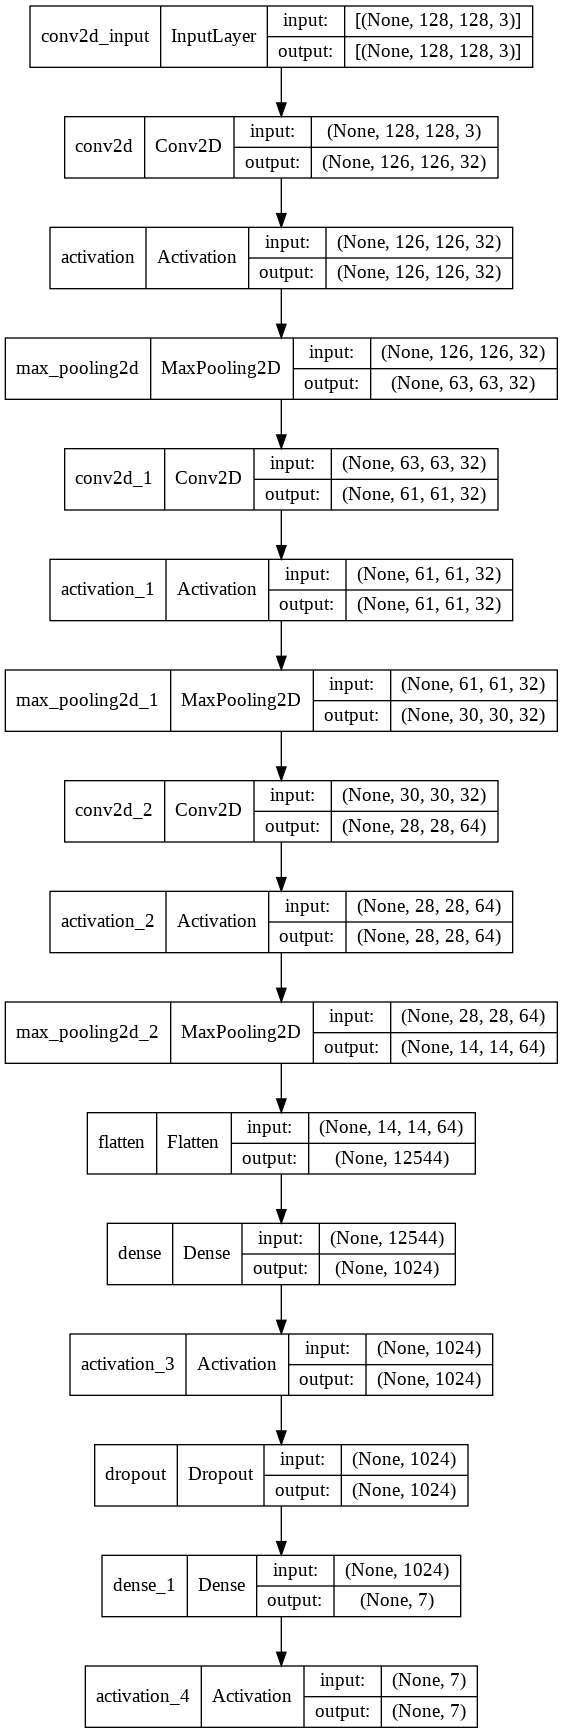

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
len(train_generator)

82

In [ ]:
hist = model.fit(train_generator,
          validation_data=test_generator, 
          steps_per_epoch=len(train_generator), 
          validation_steps=len(test_generator), 
          epochs=10)

Epoch 1/10
82/82 [==============================] - 263s 3s/step - loss: 2.5809 - accuracy: 0.2360 - val_loss: 1.5340 - val_accuracy: 0.3981
Epoch 2/10
82/82 [==============================] - 254s 3s/step - loss: 1.6376 - accuracy: 0.3524 - val_loss: 1.1691 - val_accuracy: 0.5046
Epoch 3/10
82/82 [==============================] - 257s 3s/step - loss: 1.4138 - accuracy: 0.4513 - val_loss: 1.2235 - val_accuracy: 0.4630
Epoch 4/10
82/82 [==============================] - 254s 3s/step - loss: 1.2914 - accuracy: 0.4971 - val_loss: 1.1940 - val_accuracy: 0.5694
Epoch 5/10
82/82 [==============================] - 252s 3s/step - loss: 1.2057 - accuracy: 0.5296 - val_loss: 0.9034 - val_accuracy: 0.6343
Epoch 6/10
82/82 [==============================] - 252s 3s/step - loss: 1.1371 - accuracy: 0.5708 - val_loss: 0.7418 - val_accuracy: 0.7083
Epoch 7/10
82/82 [==============================] - 250s 3s/step - loss: 1.1140 - accuracy: 0.5907 - val_loss: 1.0103 - val_accuracy: 0.6204
Epoch 8/10
82

In [ ]:
#Compile the model with a law learning rate
from tensorflow import keras
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 0.00001),
loss = keras.losses.CategoricalCrossentropy(from_logits = True),metrics = [keras.metrics.CategoricalAccuracy()])

In [ ]:
hist = model.fit(train_generator,
          validation_data=test_generator, 
          steps_per_epoch=len(train_generator), 
          validation_steps=len(test_generator), 
          epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


82/82 [==============================] - 253s 3s/step - loss: 0.8731 - categorical_accuracy: 0.6644 - val_loss: 0.7135 - val_categorical_accuracy: 0.7222
Epoch 2/5
82/82 [==============================] - 250s 3s/step - loss: 0.7933 - categorical_accuracy: 0.7014 - val_loss: 0.6999 - val_categorical_accuracy: 0.7407
Epoch 3/5
82/82 [==============================] - 250s 3s/step - loss: 0.7862 - categorical_accuracy: 0.7022 - val_loss: 0.6972 - val_categorical_accuracy: 0.7361
Epoch 4/5
82/82 [==============================] - 249s 3s/step - loss: 0.7902 - categorical_accuracy: 0.6984 - val_loss: 0.6900 - val_categorical_accuracy: 0.7407
Epoch 5/5
82/82 [==============================] - 249s 3s/step - loss: 0.7892 - categorical_accuracy: 0.7026 - val_loss: 0.6915 - val_categorical_accuracy: 0.7315


In [ ]:
probabilities = model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
np.argmax(probabilities, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 2, 1,
       2, 1, 2, 2, 2, 5, 1, 2, 5, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       0, 4, 4, 4, 4, 2, 5, 4, 4, 3, 4, 4, 3, 3, 3, 3, 4, 2, 6, 4, 4, 4,
       5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 5, 4, 5, 4, 4, 4, 4, 5,
       1, 4, 3, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 5, 5, 1, 5, 5, 1, 2, 1, 2,
       5, 5, 5, 4, 2, 2, 2, 5, 5, 2, 5, 5, 4, 1, 4, 5, 1, 5, 4, 1, 4, 4,
       4, 5, 5, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3])

In [ ]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=int32)

In [ ]:
print(classification_report(test_generator.classes, np.argmax(probabilities, axis=1)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.76      0.91      0.83        43
           2       0.64      0.72      0.68        25
           3       0.71      0.28      0.40        18
           4       0.60      0.71      0.65        38
           5       0.52      0.43      0.47        35
           6       0.97      0.94      0.96        36

    accuracy                           0.73       216
   macro avg       0.74      0.71      0.71       216
weighted avg       0.73      0.73      0.72       216



In [ ]:
model.save("CNN_Scratch_")

INFO:tensorflow:Assets written to: CNN_Scratch_/assets


In [ ]:
score=model.evaluate(test_generator, steps = test_generator.samples/test_generator.batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

6/6 [==============================] - 8s 981ms/step - loss: 0.6915 - categorical_accuracy: 0.7315
Test loss: 0.6915130019187927
Test accuracy: 0.7314814925193787


In [ ]:
!cp -r "/content/CNN_Scratch_" "/content/drive/MyDrive/Printing"

In [ ]:
from keras.models import load_model

In [ ]:
model=load_model("/content/drive/MyDrive/Printing/CNN_Scratch")

In [ ]:
print(test_generator)